In [ ]:
#LOGISTIC REGRESSION for HCV 

#Logistic regression is an example of supervised learning. It is used to calculate or predict the probability of a binary (yes/no) event occurring.

In [ ]:
import pandas as pd
import io
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv('/content/HCV.csv.csv', index_col=0)
df.head()

,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category,Unnamed: 13
Age,,,,,,,,,,,,,
32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0=Blood Donor,NaN
32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0=Blood Donor,NaN
32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0=Blood Donor,NaN
32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0=Blood Donor,NaN
32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0=Blood Donor,NaN


In [ ]:
df.describe()

,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Unnamed: 13
count,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000,0.0
mean,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137,NaN
std,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636,NaN
min,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000,NaN
25%,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000,NaN
50%,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000,NaN
75%,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000,NaN
max,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000,NaN


In [ ]:
#Category is dependent variable 

#Age	Sex	ALB	ALP	ALT	AST	BIL	CHE	CHOL	CREA	GGT	PRO are independent variable

In [ ]:

# # Drop column of index using DataFrame.iloc[] and drop() methods.
# df2 = df.drop(df.iloc[:, 0:1],axis = 1)
# print(df2)                      
# df2.shape

In [ ]:
df.nunique()

Sex              2
ALB            189
ALP            414
ALT            341
AST            297
BIL            188
CHE            407
CHOL           313
CREA           117
GGT            358
PROT           198
Category         5
Unnamed: 13      0
dtype: int64

In [ ]:
#some null values are shown here

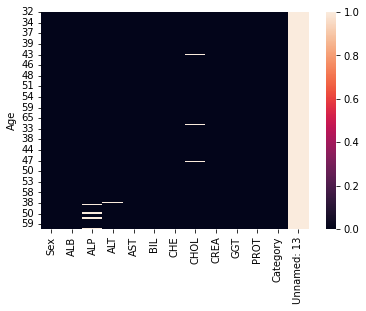

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
df.drop(['Unnamed: 13'],axis=1,inplace=True)

In [ ]:
df.fillna(0, inplace = True)


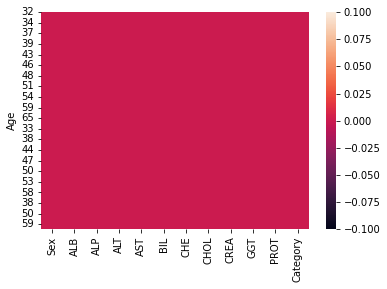

In [ ]:
sns.heatmap(df.isnull())

In [ ]:
#According to heat map - ALP CHOL AND PROT has some null values hence should be replaced by any values

In [ ]:
df.head()

,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
Age,,,,,,,,,,,,
32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0=Blood Donor
32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0=Blood Donor
32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0=Blood Donor
32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0=Blood Donor
32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0=Blood Donor


In [ ]:
labelencoder = LabelEncoder()
new_df=df
new_df['Category']=labelencoder.fit_transform(df['Category'])
new_df['Sex']=labelencoder.fit_transform(df['Sex'])

In [ ]:
new_df.head(2)

,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
Age,,,,,,,,,,,,
32,1,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0
32,1,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0


In [ ]:
a=df.corr()
a.style.background_gradient(cmap='Paired')

,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Category
Sex,1.000000,0.131317,-0.025669,0.160177,0.130891,0.111177,0.169111,0.017186,0.159589,0.133276,0.029935,0.060657
ALB,0.131317,1.000000,-0.071028,-0.004611,-0.192259,-0.213765,0.364480,0.209717,0.001046,-0.163287,0.520910,-0.312823
ALP,-0.025669,-0.071028,1.000000,-0.029767,-0.019753,-0.009932,0.053445,0.156822,0.145103,0.337397,-0.056836,-0.162111
ALT,0.160177,-0.004611,-0.029767,1.000000,0.273140,-0.038022,0.145663,0.049990,-0.042857,0.248520,0.060461,0.103473
AST,0.130891,-0.192259,-0.019753,0.273140,1.000000,0.312231,-0.208536,-0.207026,-0.021387,0.491263,-0.010115,0.648341
BIL,0.111177,-0.213765,-0.009932,-0.038022,0.312231,1.000000,-0.333172,-0.202870,0.031224,0.217024,-0.272408,0.473006
CHE,0.169111,0.364480,0.053445,0.145663,-0.208536,-0.333172,1.000000,0.363859,-0.011157,-0.110345,0.316459,-0.329472
CHOL,0.017186,0.209717,0.156822,0.049990,-0.207026,-0.202870,0.363859,1.000000,-0.025413,-0.029935,0.215883,-0.302038
CREA,0.159589,0.001046,0.145103,-0.042857,-0.021387,0.031224,-0.011157,-0.025413,1.000000,0.121003,-0.040492,0.182040
GGT,0.133276,-0.163287,0.337397,0.248520,0.491263,0.217024,-0.110345,-0.029935,0.121003,1.000000,-0.044813,0.471164


In [ ]:
x= new_df.iloc[:, 1:]
print(x)

      ALB    ALP    ALT    AST   BIL    CHE  CHOL   CREA    GGT  PROT  \
Age                                                                     
32   38.5   52.5    7.7   22.1   7.5   6.93  3.23  106.0   12.1  69.0   
32   38.5   70.3   18.0   24.7   3.9  11.17  4.80   74.0   15.6  76.5   
32   46.9   74.7   36.2   52.6   6.1   8.84  5.20   86.0   33.2  79.3   
32   43.2   52.0   30.6   22.6  18.9   7.33  4.74   80.0   33.8  75.7   
32   39.2   74.1   32.6   24.8   9.6   9.15  4.32   76.0   29.9  68.7   
..    ...    ...    ...    ...   ...    ...   ...    ...    ...   ...   
62   32.0  416.6    5.9  110.3  50.0   5.57  6.30   55.7  650.9  68.5   
64   24.0  102.8    2.9   44.4  20.0   1.54  3.02   63.0   35.9  71.3   
64   29.0   87.3    3.5   99.0  48.0   1.66  3.63   66.7   64.2  82.0   
46   33.0    0.0   39.0   62.0  20.0   3.56  4.20   52.0   50.0  71.0   
59   36.0    0.0  100.0   80.0  12.0   9.07  5.30   67.0   34.0  68.0   

     Category  
Age            
32          0  
32

In [ ]:
y= new_df.iloc[:, 0]
print(y)

Age
32    1
32    1
32    1
32    1
32    1
     ..
62    0
64    0
64    0
46    0
59    0
Name: Sex, Length: 615, dtype: int64


In [ ]:
#Extracting Independent and dependent Variable  
#all rows from  1 column to last,  except column 0 that is Category 
#all rows from  0 column ie Category
x= new_df.iloc[:, 1:].values  
y= new_df.iloc[:, 0].values  

In [ ]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.20, random_state=0)  

In [ ]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

In [ ]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train)  

LogisticRegression(random_state=0)

In [ ]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [ ]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  
cm

array([[31, 21],
       [12, 59]])

In [ ]:
acc=list()

In [ ]:
tp=cm[0][0]
fp=cm[0][1]
fn=cm[1][0]
tn=cm[1][1]
precision=tp/(tp+fp)
recall=tp/(tp+fn)
a=(tp+tn)/(tp+tn+fp+fn)
specificity = tn / (tn + fp)

In [ ]:
acc.append(a)

In [ ]:
print("tp:{} \nTN : {} \nFP : {}\nFN : {}\nprecision {}\nrecall {}\nspecificity : {}\naccuracy : {}".format(tp,tn,fp,fn,precision,recall,specificity,a))

tp:31 
TN : 59 
FP : 21
FN : 12
precision 0.5961538461538461
recall 0.7209302325581395
specificity : 0.7375
accuracy : 0.7317073170731707


In [ ]:
tested_x = classifier.predict(x_test)

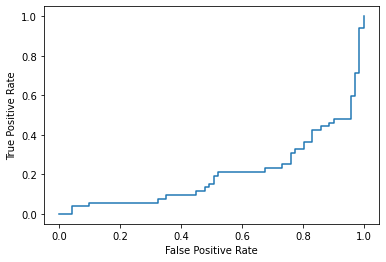

In [ ]:
from sklearn import metrics
log_regression = LogisticRegression()

log_regression.fit(x_train,y_train)
#define metrics
y_pred_proba = log_regression.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label=0)

#create ROC curve
plt.plot(fpr,tpr )
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**MLP**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
#fitting
mlp_clf = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'logistic',
                        solver = 'adam')


In [ ]:
#fitting
mlp_clf2 = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'relu',
                        solver = 'adam')


In [ ]:
#fitting
mlp_clf3 = MLPClassifier(hidden_layer_sizes=(150,100,50),
                        max_iter = 300,activation = 'tanh',
                        solver = 'adam')


In [ ]:
mlp_clf.fit(x_train, y_train)
#accuracy
yy_pred = mlp_clf.predict(x_test)
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test,yy_pred)

In [ ]:
mlp_clf2.fit(x_train, y_train)
#accuracy
yy_pred = mlp_clf2.predict(x_test)
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(y_test,yy_pred)

In [ ]:
mlp_clf3.fit(x_train, y_train)
#accuracy
yy_pred = mlp_clf3.predict(x_test)
from sklearn.metrics import confusion_matrix
cm4=confusion_matrix(y_test,yy_pred)

In [ ]:
tp=cm2[0][0]
fp=cm2[0][1]
fn=cm2[1][0]
tn=cm2[1][1]
precision=tp/(tp+fp)
recall=tp/(tp+fn)
accuracy=(tp+tn)/(tp+tn+fp+fn)
specificity = tn / (tn + fp)

In [ ]:
print("sigmoid activation function : \nTP :{} \nTN : {} \nFP : {}\nFN : {}\nprecision : {}\nrecall : {}\nspecificity : {}\naccuracy : {}".format(tp,tn,fp,fn,precision,recall,specificity,accuracy*100))

sigmoid activation function : 
TP :37 
TN : 59 
FP : 15
FN : 12
precision : 0.7115384615384616
recall : 0.7551020408163265
specificity : 0.7972972972972973
accuracy : 78.04878048780488


In [ ]:
tp=cm3[0][0]
fp=cm3[0][1]
fn=cm3[1][0]
tn=cm3[1][1]
precision=tp/(tp+fp)
recall=tp/(tp+fn)
accuracy2=(tp+tn)/(tp+tn+fp+fn)
specificity = tn / (tn + fp)

In [ ]:
print("RELU ACTIVATION FUNCTION \nTP :{} \nTN : {} \nFP : {}\nFN : {}\nprecision : {}\nrecall : {}\nspecificity : {}\naccuracy : {}".format(tp,tn,fp,fn,precision,recall,specificity,accuracy2*100))

RELU ACTIVATION FUNCTION 
TP :30 
TN : 54 
FP : 22
FN : 17
precision : 0.5769230769230769
recall : 0.6382978723404256
specificity : 0.7105263157894737
accuracy : 68.29268292682927


In [ ]:
tp=cm4[0][0]
fp=cm4[0][1]
fn=cm4[1][0]
tn=cm4[1][1]
precision=tp/(tp+fp)
recall=tp/(tp+fn)
accuracy3=(tp+tn)/(tp+tn+fp+fn)
specificity = tn / (tn + fp)

In [ ]:
print("TAN ACTION FUNCTION \nTP :{} \nTN : {} \nFP : {}\nFN : {}\nprecision : {}\nrecall : {}\nspecificity : {}\naccuracy : {}".format(tp,tn,fp,fn,precision,recall,specificity,accuracy3*100))

TAN ACTION FUNCTION 
TP :31 
TN : 55 
FP : 21
FN : 16
precision : 0.5961538461538461
recall : 0.6595744680851063
specificity : 0.7236842105263158
accuracy : 69.91869918699187


In [ ]:
acc.append(accuracy)
acc.append(accuracy2)
acc.append(accuracy3)

In [ ]:
acc

[0.7317073170731707,
 0.7804878048780488,
 0.6829268292682927,
 0.6991869918699187]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
functions=['logistic regression','sigmoid','relu','tanh']

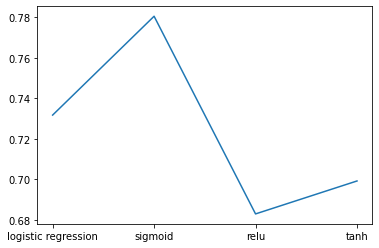

In [ ]:
plt.plot(functions, acc)

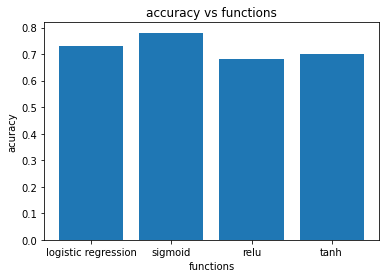

In [ ]:
plt.bar(functions, acc)
plt.title('accuracy vs functions')
plt.xlabel('functions')
plt.ylabel('acuracy')
plt.show()

MLP inference 

sigmoid has the heighest acuracy than other activation functions 
relu activation function  has the least accuracy 
then LR and tanh has the same accuracy as compared but the accuracy is still less is around 70% for all
there are no highly correlated variables nor too negatively correlated attributes 